# 3. DECISION TREE REGRESSOR MODEL

## OBJECTIVE:

## <span style = "color:pink" > Develop a web application that, shows the percentage growth in property values (€/m2), by area. With heat maps and confidence levels; for decicions-making regarding, and investment in real estate.

In [1]:
import utils as eda
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
import utils as eda
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import accuracy_score
training_data = pd.read_csv("training_data.csv")
testing_data = pd.read_csv("testing_data.csv")
anonymous_data = pd.read_csv("anonymous_data.csv")

## 3.0. Inicial preprocessing

In [2]:
df_cleaned = pd.read_csv("cleaned_data.csv")

In [3]:
df_cleaned

,Unnamed: 0,comunidad,year,precio
0,0,andalucia,2003,995.00
1,1,andalucia,2003,1033.00
2,2,andalucia,2003,1094.00
3,3,andalucia,2003,1133.00
4,4,andalucia,2004,1186.00
...,...,...,...,...
1358,1381,region-murcia,2021,1024.00
1359,1382,region-murcia,2021,1027.00
1360,1383,region-murcia,2021,1029.00
1361,1384,region-murcia,2021,1043.00


In [4]:
datos_historicos = df_cleaned.drop(columns=["Unnamed: 0"])
datos_historicos

,comunidad,year,precio
0,andalucia,2003,995.00
1,andalucia,2003,1033.00
2,andalucia,2003,1094.00
3,andalucia,2003,1133.00
4,andalucia,2004,1186.00
...,...,...,...
1358,region-murcia,2021,1024.00
1359,region-murcia,2021,1027.00
1360,region-murcia,2021,1029.00
1361,region-murcia,2021,1043.00


In [5]:
datos_historicos.to_csv('datos_historicos.csv', index=False)

## 3.2. Regression algorithm selection:

In [6]:
X_train = training_data[['comunidad', 'year']]
y_train = training_data['precio']

In [7]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 653, number of used features: 2
[LightGBM] [Info] Start training from score 1537.350689
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [8]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.98,0.98,71.82,0.13
DecisionTreeRegressor,0.97,0.97,88.46,0.01
RandomForestRegressor,0.95,0.96,103.08,0.17
HistGradientBoostingRegressor,0.95,0.95,104.01,0.08
LGBMRegressor,0.95,0.95,104.01,0.04
BaggingRegressor,0.94,0.94,116.10,0.02
ExtraTreesRegressor,0.94,0.94,121.55,0.08
GradientBoostingRegressor,0.92,0.92,139.08,0.09
ExtraTreeRegressor,0.88,0.88,166.98,0.01


<span style= "color:yellow"> The best one model is DecisionTreeRegressor, it took less time than others, and can obtain the best scores too.

In [9]:
model = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 5, random_state = 42)
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## 3.3. Visualising DecisionTreeRegressor

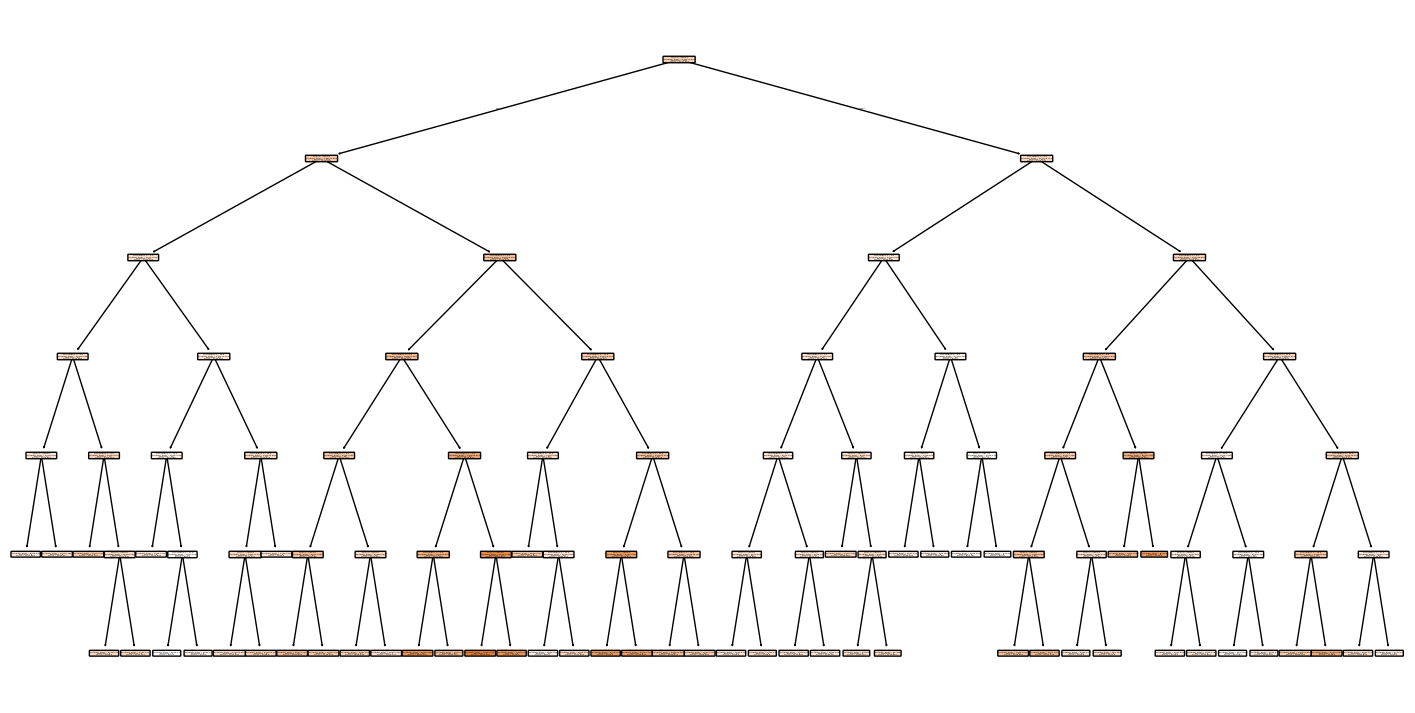

In [10]:
plt.figure(figsize = (18, 9))
plot_tree(model, feature_names = X_train.columns, filled = True, rounded = True)
plt.show()

In [11]:
text_representation = export_text(model, feature_names = list(X_train.columns))
print(text_representation)

|--- year <= 2012.50
|   |--- year <= 2004.50
|   |   |--- comunidad <= 9.50
|   |   |   |--- comunidad <= 5.00
|   |   |   |   |--- year <= 2003.50
|   |   |   |   |   |--- value: [1091.89]
|   |   |   |   |--- year >  2003.50
|   |   |   |   |   |--- value: [1286.25]
|   |   |   |--- comunidad >  5.00
|   |   |   |   |--- comunidad <= 6.50
|   |   |   |   |   |--- value: [1605.17]
|   |   |   |   |--- comunidad >  6.50
|   |   |   |   |   |--- year <= 2003.50
|   |   |   |   |   |   |--- value: [1343.20]
|   |   |   |   |   |--- year >  2003.50
|   |   |   |   |   |   |--- value: [1362.17]
|   |   |--- comunidad >  9.50
|   |   |   |--- comunidad <= 12.50
|   |   |   |   |--- comunidad <= 10.50
|   |   |   |   |   |--- value: [1106.83]
|   |   |   |   |--- comunidad >  10.50
|   |   |   |   |   |--- comunidad <= 11.50
|   |   |   |   |   |   |--- value: [687.40]
|   |   |   |   |   |--- comunidad >  11.50
|   |   |   |   |   |   |--- value: [943.40]
|   |   |   |--- comunidad >  12.5

# 3.4. Model predictions and metrics

In [12]:
X_test = testing_data[['comunidad', 'year']]
y_test = testing_data['precio']

In [13]:
X_anonymous = anonymous_data[['comunidad', 'year']]
y_anonymous = anonymous_data['precio']

In [14]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_anonymous = model.predict(X_anonymous)

In [15]:
metrics_df = eda.calculate_metrics(y_train, y_pred_train, y_test, y_pred_test)
metrics_df

,MAE,MAPE,R2
Train,142.29,0.09,0.78
Test,146.40,0.09,0.75
Difference,4.11,0.00,0.03


## 3.5. Algorithm training

In [16]:
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model_lr = DecisionTreeRegressor().fit(X_train_lr, y_train_lr)

## 3.6. Application of the model to the training and validation set

In [17]:
yhat_train_lr = model_lr.predict(X_train_lr)
yhat_val_lr = model_lr.predict(X_val_lr)

In [18]:
calculated_metrics_lr = eda.calculate_metrics(y_train_lr, yhat_train_lr, y_val_lr, yhat_val_lr)
calculated_metrics_lr

,MAE,MAPE,R2
Train,18.12,0.01,1.00
Test,51.69,0.03,0.97
Difference,33.58,0.02,0.03


## 3.7. Assembly of bagging models

In [19]:
model_base = DecisionTreeRegressor()
bagging_model = BaggingRegressor(estimator=model_base, n_estimators=10, random_state=42).fit(X_train_lr, y_train_lr)

## 3.8. Aply the model to training and validation set:

In [20]:
yhat_train_bagging = bagging_model.predict(X_train_lr)
yhat_val_bagging = bagging_model.predict(X_val_lr)
calculated_metrics_bagging = eda.calculate_metrics(y_train_lr, yhat_train_bagging, y_val_lr, yhat_val_bagging)
calculated_metrics_bagging

,MAE,MAPE,R2
Train,29.49,0.02,0.99
Test,48.38,0.03,0.98
Difference,18.88,0.01,0.01


## 3.9. Training with the entire training dataset and applying in to the test data set

In [21]:
bagging_model.fit(X_train, y_train)
yhat_train = np.exp(bagging_model.predict(X_train))
yhat_test = np.exp(bagging_model.predict(X_test))
yhat_anonymous = np.exp(bagging_model.predict(X_anonymous))
print(yhat_train)
print(yhat_test)
print(yhat_anonymous)

[           inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf            inf            inf            inf
            inf         

## 3.10. Retraining

In [22]:
X_final = pd.concat([X_train, X_test, X_anonymous])
y_final = pd.concat([y_train, y_test, y_anonymous])

## 3.11. Final preprocessing

In [23]:
categorical_features = ['comunidad']
numeric_features = ['year']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

## 3.12. Pipeline export

In [24]:
final_model = bagging_model.fit(X_final, y_final)

In [25]:
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocessor),
    ('model', final_model)
])

In [26]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocesamiento', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
joblib.dump(pipeline, "modelo_vivienda.joblib")

['modelo_vivienda.joblib']

In [28]:
loeded_pipeline = joblib.load("modelo_vivienda.joblib")